In [7]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
from matplotlib_venn import venn2, venn2_circles
import plotly.express as px
import seaborn as sns
from datetime import datetime
import scipy.stats as sci
from sklearn.cluster import KMeans               
from sklearn import metrics                     

## Preprocessing

### Main dataset 'steam_reviews.csv'

In [3]:
dataset = pd.read_csv('steam_reviews.csv')

<bound method DataFrame.info of           Unnamed: 0  app_id                  app_name  review_id  language  \
0                  0  292030  The Witcher 3: Wild Hunt   85185598  schinese   
1                  1  292030  The Witcher 3: Wild Hunt   85185250  schinese   
2                  2  292030  The Witcher 3: Wild Hunt   85185111  schinese   
3                  3  292030  The Witcher 3: Wild Hunt   85184605   english   
4                  4  292030  The Witcher 3: Wild Hunt   85184287  schinese   
...              ...     ...                       ...        ...       ...   
21747366    21747371  546560           Half-Life: Alyx   65645125   english   
21747367    21747372  546560           Half-Life: Alyx   65645115   english   
21747368    21747373  546560           Half-Life: Alyx   65645100   english   
21747369    21747374  546560           Half-Life: Alyx   65645066   english   
21747370    21747375  546560           Half-Life: Alyx   65644930  schinese   

                   

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21747371 entries, 0 to 21747370
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       int64  
 4   language                        object 
 5   review                          object 
 6   timestamp_created               int64  
 7   timestamp_updated               int64  
 8   recommended                     bool   
 9   votes_helpful                   int64  
 10  votes_funny                     int64  
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  int64  
 17  author.num_games_owned   

#### Cleaning

We check possible duplicates

In [8]:
len(dataset['review_id'])

21747371

In [7]:
len(dataset['review_id']) - len(dataset['review_id'].unique())

134927

In [11]:
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)

In [12]:
dataset = dataset.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [13]:
len(dataset['review_id'])

21612444

134927 duplicate rows/reviews dropped

In [16]:
dataset.columns

Index(['app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

In [17]:
dataset.drop(['review'], axis=1, inplace=True)

In [18]:
dataset.to_csv (r'C:\Users\anton\Desktop\Algorithmic Methods of Data Mining\Homework2\c_main.csv', index = False)

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21612444 entries, 0 to 21747370
Data columns (total 21 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   app_id                          int64  
 1   app_name                        object 
 2   review_id                       int64  
 3   language                        object 
 4   timestamp_created               int64  
 5   timestamp_updated               int64  
 6   recommended                     bool   
 7   votes_helpful                   int64  
 8   votes_funny                     int64  
 9   weighted_vote_score             float64
 10  comment_count                   int64  
 11  steam_purchase                  bool   
 12  received_for_free               bool   
 13  written_during_early_access     bool   
 14  author.steamid                  int64  
 15  author.num_games_owned          int64  
 16  author.num_reviews              int64  
 17  author.playtime_forever  

### Bonus 1 dataset 'steam_reviews_bonus_1'

In [2]:
bonus_1 = pd.read_csv('steam_reviews_bonus_1.csv')

C:\Users\anton\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,8,9,10,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
bonus_1.head()

Unnamed: 0  Unnamed: 0.1    app_id                  app_name  review_id  \
0          0             0  292030.0  The Witcher 3: Wild Hunt   85185598   
1          1             1  292030.0  The Witcher 3: Wild Hunt   85185250   
2          2             2  292030.0  The Witcher 3: Wild Hunt   85185111   
3          3             3  292030.0  The Witcher 3: Wild Hunt   85184605   
4          4             4  292030.0  The Witcher 3: Wild Hunt   85184287   

   language                                             review  \
0  schinese                            不玩此生遗憾，RPG游戏里的天花板，太吸引人了   
1  schinese                                 拔DIAO无情打桩机--杰洛特!!!   
2  schinese                                              巫师3NB   
3   english  One of the best RPG's of all time, worthy of a...   
4  schinese                                                 大作   

   timestamp_created timestamp_updated recommended  ... steam_purchase  \
0       1.034411e+09      1034410880.0        True  ...           True   
1       1.336568e+09      1336567596.0        True  ...          False   
2       1.142145e+09      1142145175.0        True  ...           True   
3       9.801152e+08       980115225.0        True  ...           True   
4       9.926147e+08       992614717.0        True  ...           True   

   received_for_free  written_during_early_access  author.steamid  \
0              False                        False    7.656120e+16   
1              False                        False    7.656120e+16   
2              False                        False    7.656120e+16   
3              False                         True    7.656120e+16   
4              False                        False    7.656120e+16   

  author.num_games_owned author.num_reviews author.playtime_forever  \
0                  367.0               10.0                  1909.0   
1                   11.0              112.0                  2764.0   
2                   53.0                1.0                  1061.0   
3                  168.0                1.0                  5587.0   
4                    4.0               14.0                   217.0   

   author.playtime_last_two_weeks  author.playtime_at_review  \
0                          1448.0                     1909.0   
1                          2743.0                     2674.0   
2                          1061.0                     1060.0   
3                          3200.0                     5524.0   
4                            42.0                      217.0   

   author.last_played  
0        1.021116e+09  
1        1.327515e+09  
2        1.137779e+09  
3        9.746538e+08  
4        9.830412e+08  

[5 rows x 24 columns]

In [4]:
bonus_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000004 entries, 0 to 10000003
Data columns (total 24 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      object 
 1   Unnamed: 0.1                    int64  
 2   app_id                          float64
 3   app_name                        object 
 4   review_id                       int64  
 5   language                        object 
 6   review                          object 
 7   timestamp_created               float64
 8   timestamp_updated               object 
 9   recommended                     object 
 10  votes_helpful                   object 
 11  votes_funny                     float64
 12  weighted_vote_score             float64
 13  comment_count                   float64
 14  steam_purchase                  object 
 15  received_for_free               object 
 16  written_during_early_access     object 
 17  author.steamid           

In [5]:
len(bonus_1['review_id'])

10000004

In [6]:
bonus_1.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [7]:
len(bonus_1['review_id']) - len(bonus_1['review_id'].unique())

2

In [8]:
bonus_1.drop(['review'], axis=1, inplace=True)

In [9]:
bonus_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000004 entries, 0 to 10000003
Data columns (total 21 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   app_id                          float64
 1   app_name                        object 
 2   review_id                       int64  
 3   language                        object 
 4   timestamp_created               float64
 5   timestamp_updated               object 
 6   recommended                     object 
 7   votes_helpful                   object 
 8   votes_funny                     float64
 9   weighted_vote_score             float64
 10  comment_count                   float64
 11  steam_purchase                  object 
 12  received_for_free               object 
 13  written_during_early_access     object 
 14  author.steamid                  float64
 15  author.num_games_owned          float64
 16  author.num_reviews              float64
 17  author.playtime_forever  

In [10]:
bonus_1.columns

Index(['app_id', 'app_name', 'review_id', 'language', 'timestamp_created',
       'timestamp_updated', 'recommended', 'votes_helpful', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'steam_purchase',
       'received_for_free', 'written_during_early_access', 'author.steamid',
       'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

#### NaN and Inf rows removal

In [11]:
bonus_1 = bonus_1[~bonus_1.isin([np.nan, np.inf, -np.inf]).any(1)]

In [12]:
bonus_1.shape

(9988199, 21)

#### Column type conversion

In [13]:
bonus_1 = bonus_1.astype({"app_id": np.int64, "timestamp_created": np.int64, "timestamp_updated": float, "recommended": bool, "votes_helpful": np.int64, "votes_funny": np.int64, "comment_count": np.int64, "steam_purchase": bool, "received_for_free": bool, "written_during_early_access": bool, "author.steamid": np.int64, "author.num_games_owned": np.int64, "author.num_reviews": np.int64}) #errors="ignore")

# timestamp_updated issue: int(float(str))
bonus_1 = bonus_1.astype({"timestamp_updated": np.int64})

In [14]:
bonus_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9988199 entries, 0 to 10000003
Data columns (total 21 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   app_id                          int64  
 1   app_name                        object 
 2   review_id                       int64  
 3   language                        object 
 4   timestamp_created               int64  
 5   timestamp_updated               int64  
 6   recommended                     bool   
 7   votes_helpful                   int64  
 8   votes_funny                     int64  
 9   weighted_vote_score             float64
 10  comment_count                   int64  
 11  steam_purchase                  bool   
 12  received_for_free               bool   
 13  written_during_early_access     bool   
 14  author.steamid                  int64  
 15  author.num_games_owned          int64  
 16  author.num_reviews              int64  
 17  author.playtime_forever   

In [15]:
bonus_1.to_csv (r'C:\Users\anton\Desktop\Algorithmic Methods of Data Mining\Homework2\bonus_1.csv', index = False)

### Bonus 2 dataset 'steam_reviews_bonus_2'

In [3]:
bonus_2 = pd.read_csv('steam_reviews_bonus_2.csv')

C:\Users\anton\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,8,9,10,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
bonus_2.head()

Unnamed: 0  Unnamed: 0.1    app_id       app_name  review_id language  \
0          0      10000001  252950.0  Rocket League   53011669  spanish   
1          1      10000002  252950.0  Rocket League   53011639  spanish   
2          2      10000003  252950.0  Rocket League   53011606    dutch   
3          3      10000004  252950.0  Rocket League   53011596  english   
4          4      10000005  252950.0  Rocket League   53011567  english   

                                              review  timestamp_created  \
0                                            juegaoz       1.560382e+09   
1  El juego perfecto para todo amante del Futbol ...       1.221077e+09   
2                                  dis geim very gud       9.787585e+08   
3  It's all fun and games until it's you versus y...       1.565559e+09   
4  Everytime when I think rockey league is fun, m...       1.499632e+09   

  timestamp_updated recommended  ... steam_purchase  received_for_free  \
0      1560381544.0        True  ...           True              False   
1      1221076632.0        True  ...           True              False   
2       978758528.0        True  ...           True              False   
3      1565558703.0        True  ...           True              False   
4      1499632396.0        True  ...           True              False   

   written_during_early_access  author.steamid author.num_games_owned  \
0                        False    7.656120e+16                  200.0   
1                        False    7.656120e+16                    3.0   
2                         True    7.656120e+16                    9.0   
3                        False    7.656120e+16                   65.0   
4                        False    7.656120e+16                  115.0   

  author.num_reviews author.playtime_forever  author.playtime_last_two_weeks  \
0                2.0                 32539.0                           415.0   
1                1.0                104293.0                             0.0   
2               15.0                 36262.0                             0.0   
3                2.0                 34361.0                             0.0   
4                7.0                 37264.0                           202.0   

   author.playtime_at_review  author.last_played  
0                     2367.0        1.553751e+09  
1                    81336.0        1.216889e+09  
2                    31369.0        9.705828e+08  
3                    33888.0        1.552424e+09  
4                    27925.0        1.488265e+09  

[5 rows x 24 columns]

In [5]:
bonus_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000004 entries, 0 to 7000003
Data columns (total 24 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      object 
 1   Unnamed: 0.1                    int64  
 2   app_id                          float64
 3   app_name                        object 
 4   review_id                       int64  
 5   language                        object 
 6   review                          object 
 7   timestamp_created               float64
 8   timestamp_updated               object 
 9   recommended                     object 
 10  votes_helpful                   object 
 11  votes_funny                     float64
 12  weighted_vote_score             float64
 13  comment_count                   float64
 14  steam_purchase                  object 
 15  received_for_free               object 
 16  written_during_early_access     object 
 17  author.steamid             

In [6]:
len(bonus_2['review_id'])

7000004

In [7]:
bonus_2.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [8]:
len(bonus_2['review_id']) - len(bonus_2['review_id'].unique())

2

In [9]:
bonus_2.drop(['review'], axis=1, inplace=True)

In [10]:
bonus_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000004 entries, 0 to 7000003
Data columns (total 21 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   app_id                          float64
 1   app_name                        object 
 2   review_id                       int64  
 3   language                        object 
 4   timestamp_created               float64
 5   timestamp_updated               object 
 6   recommended                     object 
 7   votes_helpful                   object 
 8   votes_funny                     float64
 9   weighted_vote_score             float64
 10  comment_count                   float64
 11  steam_purchase                  object 
 12  received_for_free               object 
 13  written_during_early_access     object 
 14  author.steamid                  float64
 15  author.num_games_owned          float64
 16  author.num_reviews              float64
 17  author.playtime_forever    

#### NaN and Inf rows removal

In [11]:
bonus_2 = bonus_2[~bonus_2.isin([np.nan, np.inf, -np.inf]).any(1)]

In [12]:
bonus_2.shape

(6991806, 21)

#### Column type conversion

In [13]:
bonus_2 = bonus_2.astype({"app_id": np.int64, "timestamp_created": np.int64, "timestamp_updated": float, "recommended": bool, "votes_helpful": np.int64, "votes_funny": np.int64, "comment_count": np.int64, "steam_purchase": bool, "received_for_free": bool, "written_during_early_access": bool, "author.steamid": np.int64, "author.num_games_owned": np.int64, "author.num_reviews": np.int64})#, errors="ignore")

bonus_2 = bonus_2.astype({"timestamp_updated": np.int64})

In [14]:
bonus_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6991806 entries, 0 to 7000003
Data columns (total 21 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   app_id                          int64  
 1   app_name                        object 
 2   review_id                       int64  
 3   language                        object 
 4   timestamp_created               int64  
 5   timestamp_updated               int64  
 6   recommended                     bool   
 7   votes_helpful                   int64  
 8   votes_funny                     int64  
 9   weighted_vote_score             float64
 10  comment_count                   int64  
 11  steam_purchase                  bool   
 12  received_for_free               bool   
 13  written_during_early_access     bool   
 14  author.steamid                  int64  
 15  author.num_games_owned          int64  
 16  author.num_reviews              int64  
 17  author.playtime_forever    

In [15]:
bonus_2.to_csv (r'C:\Users\anton\Desktop\Algorithmic Methods of Data Mining\Homework2\bonus_2.csv', index = False)

### Joint dataset

In [2]:
main = pd.read_csv('c_main.csv')

In [3]:
bonus_1 = pd.read_csv('bonus_1.csv')

In [4]:
bonus_2 = pd.read_csv('bonus_2.csv')

#### We check for incongruences in the datasets and reliability

In [5]:
df = [main, bonus_1, bonus_2]
f_dataset = pd.concat(df)

In [6]:
f_dataset.shape

(38592449, 21)

In [8]:
len(f_dataset['review_id']) - len(f_dataset['review_id'].unique())

16980005

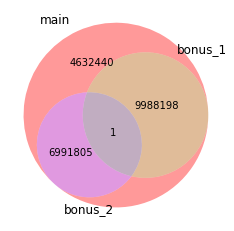

In [13]:
A1 = main['review_id']
B1 = bonus_1['review_id']
C1 = bonus_2['review_id']

venn3([set(A1), set(B1), set(C1)], set_labels = ('main', 'bonus_1', 'bonus_2'))
plt.show()

We found in both bonus datasets incongruities and anomalies in terms of both the identification number of the review and the release date of the review.
In particular, concerning review id, the two bonus datasets are subsets of the main dataset. In addition, there is no correspondence between the review id and the reviewer steam id number.
We also detect cases where the release date of the review is even earlier than the release date of the game it refers to.
For this reasons we do not consider the two bonus datasets to be reliable.
Below are some examples

In [24]:
bonus_1.head(5)

app_id                  app_name  review_id  language  timestamp_created  \
0  292030  The Witcher 3: Wild Hunt   85185598  schinese         1034410880   
1  292030  The Witcher 3: Wild Hunt   85185250  schinese         1336567596   
2  292030  The Witcher 3: Wild Hunt   85185111  schinese         1142145175   
3  292030  The Witcher 3: Wild Hunt   85184605   english          980115225   
4  292030  The Witcher 3: Wild Hunt   85184287  schinese          992614717   

   timestamp_updated  recommended  votes_helpful  votes_funny  \
0         1034410880         True              0            0   
1         1336567596         True              0            0   
2         1142145175         True              0            0   
3          980115225         True              0            0   
4          992614717         True              0            0   

   weighted_vote_score  ...  steam_purchase  received_for_free  \
0                  0.0  ...            True              False   
1                  0.0  ...           False              False   
2                  0.0  ...            True              False   
3                  0.0  ...            True              False   
4                  0.0  ...            True              False   

   written_during_early_access     author.steamid  author.num_games_owned  \
0                        False  76561197926544592                     367   
1                        False  76561197868637904                      11   
2                        False  76561197908735472                      53   
3                         True  76561197861677504                     168   
4                        False  76561197868190592                       4   

   author.num_reviews  author.playtime_forever  \
0                  10                   1909.0   
1                 112                   2764.0   
2                   1                   1061.0   
3                   1                   5587.0   
4                  14                    217.0   

   author.playtime_last_two_weeks  author.playtime_at_review  \
0                          1448.0                     1909.0   
1                          2743.0                     2674.0   
2                          1061.0                     1060.0   
3                          3200.0                     5524.0   
4                            42.0                      217.0   

   author.last_played  
0        1.021116e+09  
1        1.327515e+09  
2        1.137779e+09  
3        9.746538e+08  
4        9.830412e+08  

[5 rows x 21 columns]

In [25]:
main[(main['review_id'] == 85184605)]

app_id                  app_name  review_id language  timestamp_created  \
3  292030  The Witcher 3: Wild Hunt   85184605  english         1611379970   

   timestamp_updated  recommended  votes_helpful  votes_funny  \
3         1611379970         True              0            0   

   weighted_vote_score  ...  steam_purchase  received_for_free  \
3                  0.0  ...            True              False   

   written_during_early_access     author.steamid  author.num_games_owned  \
3                        False  76561199054755373                       5   

   author.num_reviews  author.playtime_forever  \
3                   3                   5587.0   

   author.playtime_last_two_weeks  author.playtime_at_review  \
3                          3200.0                     5524.0   

   author.last_played  
3        1.611384e+09  

[1 rows x 21 columns]

In [26]:
bonus_2.head(5)

app_id       app_name  review_id language  timestamp_created  \
0  252950  Rocket League   53011669  spanish         1560381544   
1  252950  Rocket League   53011639  spanish         1221076632   
2  252950  Rocket League   53011606    dutch          978758528   
3  252950  Rocket League   53011596  english         1565558703   
4  252950  Rocket League   53011567  english         1499632396   

   timestamp_updated  recommended  votes_helpful  votes_funny  \
0         1560381544         True              0            1   
1         1221076632         True              0            0   
2          978758528         True              2            1   
3         1565558703         True              2            0   
4         1499632396         True              0            0   

   weighted_vote_score  ...  steam_purchase  received_for_free  \
0              0.00000  ...            True              False   
1              0.00000  ...            True              False   
2              0.00000  ...            True              False   
3              0.52381  ...            True              False   
4              0.00000  ...            True              False   

   written_during_early_access     author.steamid  author.num_games_owned  \
0                        False  76561197955885920                     200   
1                        False  76561197889360384                       3   
2                         True  76561197882134752                       9   
3                        False  76561197868805200                      65   
4                        False  76561197896821392                     115   

   author.num_reviews  author.playtime_forever  \
0                   2                  32539.0   
1                   1                 104293.0   
2                  15                  36262.0   
3                   2                  34361.0   
4                   7                  37264.0   

   author.playtime_last_two_weeks  author.playtime_at_review  \
0                           415.0                     2367.0   
1                             0.0                    81336.0   
2                             0.0                    31369.0   
3                             0.0                    33888.0   
4                           202.0                    27925.0   

   author.last_played  
0        1.553751e+09  
1        1.216889e+09  
2        9.705828e+08  
3        1.552424e+09  
4        1.488265e+09  

[5 rows x 21 columns]

In [29]:
main[(main['review_id'] == 53011606)]

app_id       app_name  review_id language  timestamp_created  \
10000001  252950  Rocket League   53011606    dutch         1562019541   

          timestamp_updated  recommended  votes_helpful  votes_funny  \
10000001         1562019541         True              1            0   

          weighted_vote_score  ...  steam_purchase  received_for_free  \
10000001                  0.0  ...            True              False   

          written_during_early_access     author.steamid  \
10000001                        False  76561198037528451   

          author.num_games_owned  author.num_reviews  author.playtime_forever  \
10000001                      76                   2                  36262.0   

          author.playtime_last_two_weeks  author.playtime_at_review  \
10000001                             0.0                    31369.0   

          author.last_played  
10000001        1.608756e+09  

[1 rows x 21 columns]

# Beginning of exercises

In [27]:
dataset = pd.read_csv('c_main.csv')

## RQ1

In [3]:
# check review_id
len(dataset['review_id']) == len(dataset['review_id'].unique())

True

### Info

In [24]:
n_rev = len(dataset['review_id'].unique())
n_app = len(dataset['app_id'].unique())
n_aut = len(dataset['author.steamid'].unique())
t_range = [parsedate(dataset['timestamp_created'].min()), parsedate(dataset['timestamp_created'].max())]
# parsedate defined in RQ3

print("The dataset contains", n_rev, "reviews on", n_app, "applications, released by",\
      n_aut, "Steam users, in the time span from", t_range[0], "to", t_range[1])

The dataset contains 21612444 reviews on 315 applications, released by 12406560 Steam users, in the time span from 2010-11-19 20:17:16 to 2021-01-23 18:24:47


Other general information in the preprocessing section (columns, types, etc.).

### User trustworthiness

Users who review without playing

In [25]:
len(dataset[(dataset['author.playtime_forever'] == 0)]['review_id'])

437

In [30]:
us_notime = dataset[(dataset['author.playtime_forever'] == 0)].groupby('author.steamid')['review_id'].count().sort_values(ascending=False).head(5).reset_index()
us_notime = us_notime.rename(columns={'review_id': 'number_review'})
us_notime
# column number_review: Number of reviews issued by the user without playing

author.steamid  number_review
0  76561198058370244             14
1  76561197977081885              4
2  76561198038299319              3
3  76561197964009814              3
4  76561197968399182              2

### Playtime

When does the user review the application?

In [51]:
def plot_review_time(df):
        
    f = plt.figure()
    ax1 = f.add_subplot(221)
    ax2 = f.add_subplot(222)
    
    ds1 = df[(df['author.playtime_at_review'] != 0) & (df['author.playtime_forever'] != 0)][['author.playtime_at_review', 'author.playtime_forever']]
    ds1['ratio'] = ds1['author.playtime_at_review'] * 100 / ds1['author.playtime_forever']
    ds1 = ds1[(ds1['ratio'] <= 100)]
    
    ds2 = df[(df['author.playtime_at_review'] != 0) & (df['author.playtime_forever'] != 0) & (df['recommended'] == False)][['author.playtime_at_review', 'author.playtime_forever']]
    ds2['ratio'] = ds2['author.playtime_at_review'] * 100 / ds2['author.playtime_forever']
    ds2 = ds2[(ds2['ratio'] <= 100)]
    
    aux1 = ds1['ratio'].to_numpy()
    weights1 = np.ones_like(aux1) / len(aux1)
    
    aux2 = ds2['ratio'].to_numpy()
    weights2 = np.ones_like(aux2) / len(aux2)
    
    ds1['ratio'].plot(kind = 'hist', bins=20, weights=weights1, edgecolor="darkslategray", color='azure', ax=ax1, xlim=(0, 100))
    ax1.set_xlabel('% ptime_review / ptime')
    ax1.title.set_text('frequency all')
    
    ds2['ratio'].plot(kind = 'hist', bins=20, weights=weights2, edgecolor="darkgoldenrod", color='lightyellow', ax=ax2, xlim=(0, 100))
    ax2.set_xlabel('% ptime_review / ptime')
    ax2.title.set_text('frequency recommended == False')

    f.set_figheight(12)
    f.set_figwidth(15)
    plt.show()
    
    return ds1['ratio'].describe()

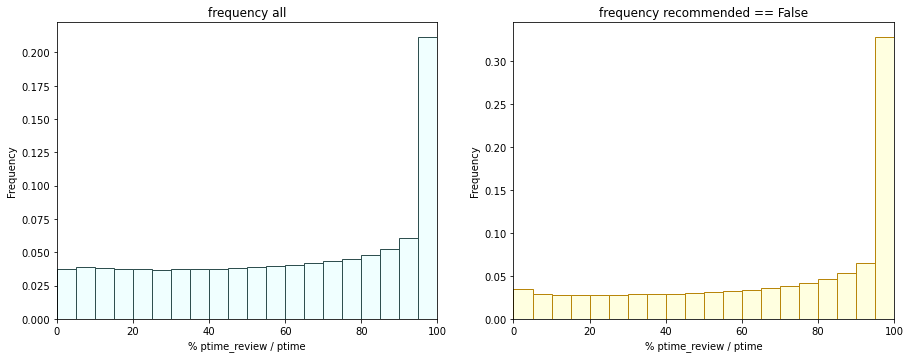

count    2.158060e+07
mean     6.094943e+01
std      3.194261e+01
min      2.455024e-04
25%      3.318023e+01
50%      6.546733e+01
75%      9.200000e+01
max      1.000000e+02
Name: ratio, dtype: float64

In [52]:
plot_review_time(dataset)

More than 20% of reviews are released after 95% of application playtime

More than 30% of "negative" reviews are released after 95% of application playtime

### Game placement

As an overview, we decided to extract useful information from the dataframe to determine the placement of the 315 applications.

Concerning the applications, as parameters to identify sub-categories, we chose a diffusion rating, an approval rating and a corrected playtime.

In [28]:
# dataframe number_review per 'app_name'
# number_review per game as diffusion rating
number_review = dataset.groupby('app_name').review_id.count().sort_values(ascending=False).reset_index()
number_review = number_review.rename(columns={'app_name': 'app_name', 'review_id': 'number_review'})

In [29]:
# rec: dataframe total recommended per 'app_name'
rec = dataset.groupby('app_name')['recommended'].count().reset_index()

# rec_True: dataframe recommended == True per 'app_name'
rec_True = dataset[(dataset.recommended == True)].groupby('app_name')['recommended'].count().reset_index()
rec_True = rec_True.rename(columns={'app_name': 'app_name', 'recommended': 'rec_True'})

In [30]:
# merge the df and match them on 'app name'
mergedf = rec_True.merge(rec, left_on = 'app_name', right_on = 'app_name')
# percent_True: ratio column added as approval rating
mergedf['percent_True'] = mergedf['rec_True'] / mergedf['recommended']

mergedf = mergedf.merge(number_review, left_on = 'app_name', right_on = 'app_name')

corrected playtime

In [31]:
new = dataset[(dataset['author.playtime_last_two_weeks'] == 0) & (dataset['recommended'] == True)][['app_name', 'author.playtime_forever']]

In [32]:
ptime = new.groupby('app_name')['author.playtime_forever'].mean().reset_index()
ptime = ptime.rename(columns={'author.playtime_forever': 'mean_playtime'})
new = new.merge(ptime, left_on = 'app_name', right_on = 'app_name')
ptime1 = new[(new['author.playtime_forever'] >= new['mean_playtime'])]

In [33]:
ptime2 = ptime1.groupby('app_name')['author.playtime_forever'].mean().reset_index()

In [34]:
ptime2 = ptime2.rename(columns={'author.playtime_forever': 'mean_playtime'})

In [35]:
mergedf = mergedf.merge(ptime2, left_on = 'app_name', right_on = 'app_name')
mergedf

app_name  rec_True  recommended  \
0                                     20XX      3349         3610   
1                            A Hat in Time     34318        34979   
2                             A Short Hike      5797         5847   
3                                A Way Out      9766        10941   
4                    ARK: Survival Evolved    315243       400009   
..                                     ...       ...          ...   
310                                 XCOM 2     52732        61636   
311                               Yakuza 0     29774        31775   
312                         Youtubers Life      9566        12621   
313           theHunter: Call of the Wild™     57452        67240   
314  三国群英传8 Heroes of the Three Kingdoms 8      4677         8111   

     percent_True  number_review  mean_playtime  
0        0.927701           3610    6265.116702  
1        0.981103          34979    5479.327992  
2        0.991449           5847     621.067217  
3        0.892606          10941     762.331044  
4        0.788090         400009   93432.641679  
..            ...            ...            ...  
310      0.855539          61636   29245.354946  
311      0.937026          31775    7315.022915  
312      0.757943          12621    4068.547136  
313      0.854432          67240   13116.907983  
314      0.576624           8111    1016.000000  

[315 rows x 6 columns]

In [36]:
bubble_plot = px.scatter(mergedf, x="number_review", y="percent_True",
             size="mean_playtime", color="app_name",
                 hover_name="app_name", log_x=True, size_max=25)
bubble_plot.show()

# not visible on GitHub

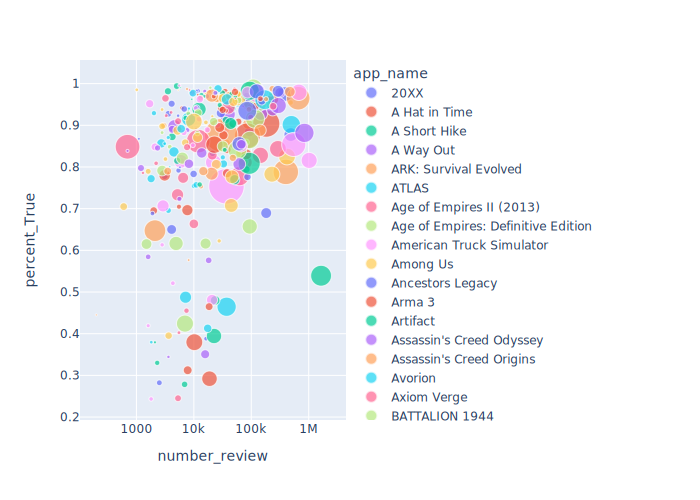

In [37]:
bubble_plot.show("svg")

We tried to identify subcategories based on approval rating ("percent_True" column), diffusion rating ("number_review" column) and corrected playtime ("mean_playtime" column)

In [52]:
mergedf['log_playtime'] = np.log(mergedf['mean_playtime'])
mergedf['log_nrev'] = np.log(mergedf['number_review'])
mergedf['per_True10'] = 10 * mergedf['percent_True']

In [53]:
mergedf.head()

app_name  rec_True  recommended  percent_True  number_review  \
0                   20XX      3349         3610      0.927701           3610   
1          A Hat in Time     34318        34979      0.981103          34979   
2           A Short Hike      5797         5847      0.991449           5847   
3              A Way Out      9766        10941      0.892606          10941   
4  ARK: Survival Evolved    315243       400009      0.788090         400009   

   mean_playtime  log_playtime   log_nrev  per_True10  
0    6265.116702      8.742752   8.191463    9.277008  
1    5479.327992      8.608738  10.462503    9.811029  
2     621.067217      6.431439   8.673684    9.914486  
3     762.331044      6.636381   9.300272    8.926058  
4   93432.641679     11.444996  12.899242    7.880898

In [54]:
x = mergedf.iloc[:, [7,8,6]].values

C:\Users\anton\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



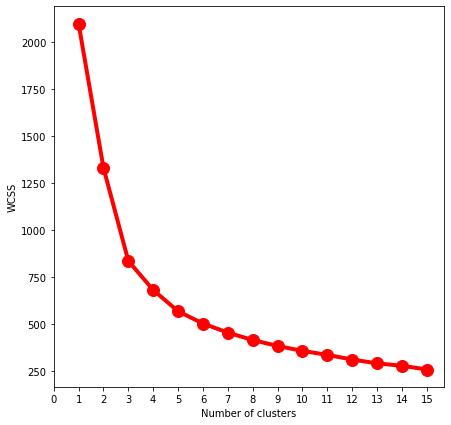

In [56]:
# find the optimal number of clusters using elbow method
WCSS = []
for i in range(1,16):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,16),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(16))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [57]:
# finding the clusters based on input matrix "x"
model = KMeans(n_clusters = 10, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

C:\Users\anton\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

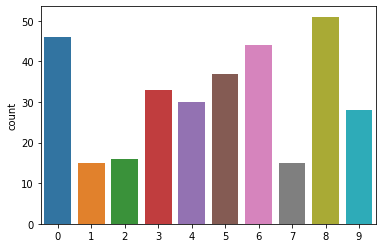

In [58]:
# countplot to check the number of clusters and number of customers in each cluster
sns.countplot(y_clusters)

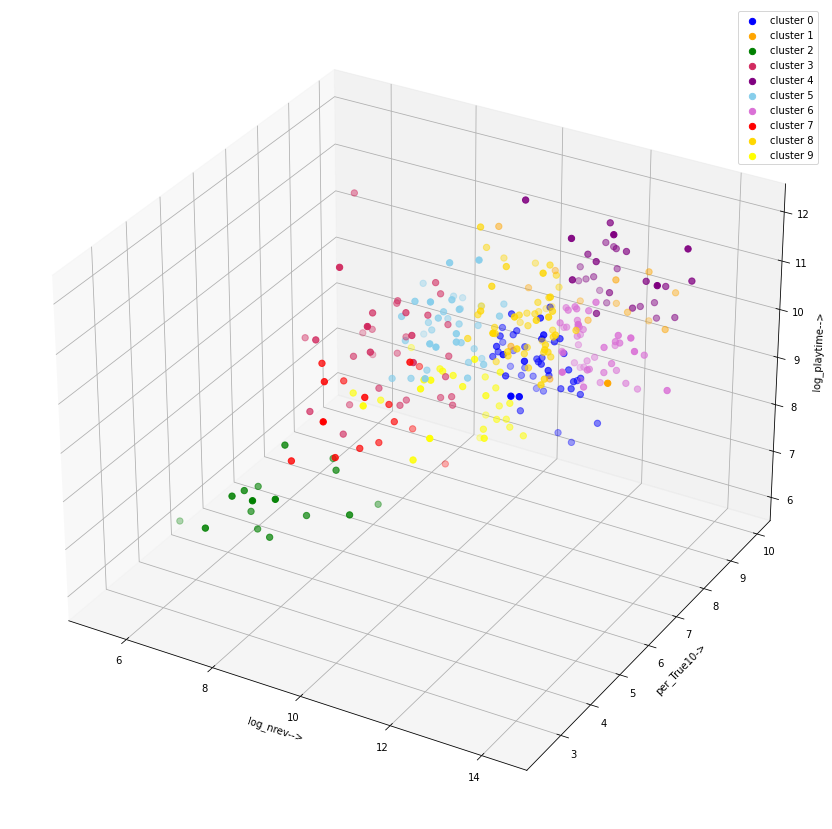

In [59]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.scatter(x[y_clusters == 5,0],x[y_clusters == 5,1],x[y_clusters == 5,2], s = 40 , color = 'skyblue', label = "cluster 5")
ax.scatter(x[y_clusters == 6,0],x[y_clusters == 6,1],x[y_clusters == 6,2], s = 40 , color = 'orchid', label = "cluster 6")
ax.scatter(x[y_clusters == 7,0],x[y_clusters == 7,1],x[y_clusters == 7,2], s = 40 , color = 'red', label = "cluster 7")
ax.scatter(x[y_clusters == 8,0],x[y_clusters == 8,1],x[y_clusters == 8,2], s = 40 , color = 'gold', label = "cluster 8")
ax.scatter(x[y_clusters == 9,0],x[y_clusters == 9,1],x[y_clusters == 9,2], s = 40 , color = 'yellow', label = "cluster 9")

ax.set_xlabel('log_nrev-->')
ax.set_ylabel('per_True10->')
ax.set_zlabel('log_playtime-->')
ax.legend()
plt.show()

### Review release time (per relevant application RQ2)

In [45]:
def plot_review_release(df):
    
    f = plt.figure()
    ax1 = f.add_subplot(221)
    ax2 = f.add_subplot(222)
    
    df['weeks_from_first'] = (df['timestamp_created'] - df['timestamp_created'].min()) // 604800

    df1 = df[(df['recommended'] == True)][['app_name', 'weeks_from_first', 'recommended']]
    bins_1 = len(df1['weeks_from_first'].unique())
    p_peak = df1.groupby('weeks_from_first')['recommended'].count().sort_values(ascending=False).reset_index()
    
    df2 = df[(df['recommended'] == False)][['app_name', 'weeks_from_first', 'recommended']]
    bins_2 = len(df2['weeks_from_first'].unique())
    n_peak = df2.groupby('weeks_from_first')['recommended'].count().sort_values(ascending=False).reset_index()
    
    df1['weeks_from_first'].plot(kind = 'hist', bins=bins_1, edgecolor="darkslategray", color='azure', ax=ax1, xlim=(0, df1['weeks_from_first'].max()))
    ax1.set_xlabel('weeks from first review')
    ax1.title.set_text('recommended == True reviews occurrence per weeks')
    
    df2['weeks_from_first'].plot(kind = 'hist', bins=bins_2, edgecolor="darkgoldenrod", color='lightyellow', ax=ax2, xlim=(0, df2['weeks_from_first'].max()))
    ax2.set_xlabel('weeks from first review')
    ax2.title.set_text('recommended == False reviews occurrence per weeks')

    f.set_figheight(12)
    f.set_figwidth(15)
    plt.show()
    
    # maybe clearer if based on weeks_from_last
    
    return p_peak.head(3), df1['weeks_from_first'].describe(), n_peak.head(3), df2['weeks_from_first'].describe()

The following three applications are relevant because:

-"Factorio" is the second most approved (0.989);

-both "PLAYERUNKNOWN'S BATTLEGROUNDS" and "Grand Theft Auto V" respectively are the first and second applications both for the number of positive reviews ('recommended' == True) and for the number of negative ones('recommended' == False);

-"PLAYERUNKNOWN'S BATTLEGROUNDS", moreover, is a special case and is practically isolated in the bubble plot, since, despite a rather low approval rating (0.539), it is still the most widespread on the Steam platform.

In all these cases, there is a significant increase in occurrences in the most recent weeks, during the pandemic.

#### "Factorio"

In [46]:
t_range_0 = [parsedate(dataset[(dataset['app_name'] == "Factorio")]['timestamp_created'].min()), parsedate(dataset[(dataset['app_name'] == "Factorio")]['timestamp_created'].max())]
print("Time span (Factorio) reviews: from", t_range_0[0], "to", t_range_0[1])

Time span (Factorio) reviews: from 2016-02-25 19:17:22 to 2021-01-23 17:15:19


<ipython-input-45-25da3d7d11f2>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



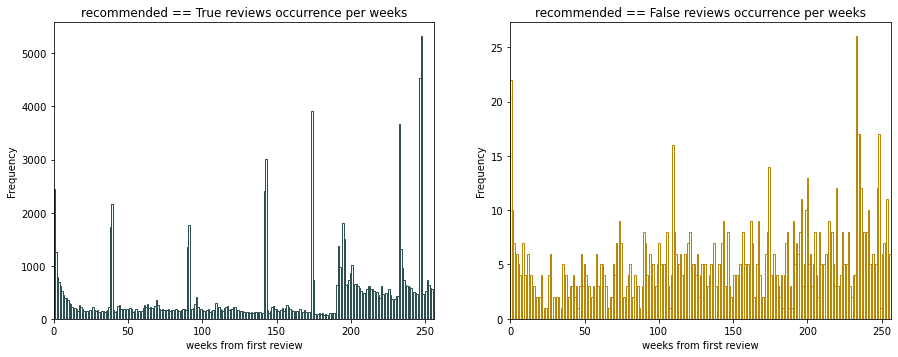

(   weeks_from_first  recommended
 0               248         5319
 1               247         4531
 2               174         3923,
 count    107111.000000
 mean        155.647254
 std          81.971210
 min           0.000000
 25%          90.000000
 50%         184.000000
 75%         231.000000
 max         256.000000
 Name: weeks_from_first, dtype: float64,
    weeks_from_first  recommended
 0               233           26
 1               234           17
 2               235           17,
 count    1171.000000
 mean      146.461998
 std        75.578369
 min         0.000000
 25%        90.500000
 50%       157.000000
 75%       214.000000
 max       256.000000
 Name: weeks_from_first, dtype: float64)

In [47]:
plot_review_release(dataset[(dataset['app_name'] == "Factorio")])

#### "PLAYERUNKNOWN'S BATTLEGROUNDS"

In [48]:
t_range_1 = [parsedate(dataset[(dataset['app_name'] == "PLAYERUNKNOWN'S BATTLEGROUNDS")]['timestamp_created'].min()), parsedate(dataset[(dataset['app_name'] == "PLAYERUNKNOWN'S BATTLEGROUNDS")]['timestamp_created'].max())]
print("Time span (PLAYERUNKNOWN'S BATTLEGROUNDS) reviews: from", t_range_1[0], "to", t_range_1[1])

Time span (PLAYERUNKNOWN'S BATTLEGROUNDS) reviews: from 2017-03-23 15:27:35 to 2021-01-23 16:32:13


<ipython-input-45-25da3d7d11f2>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



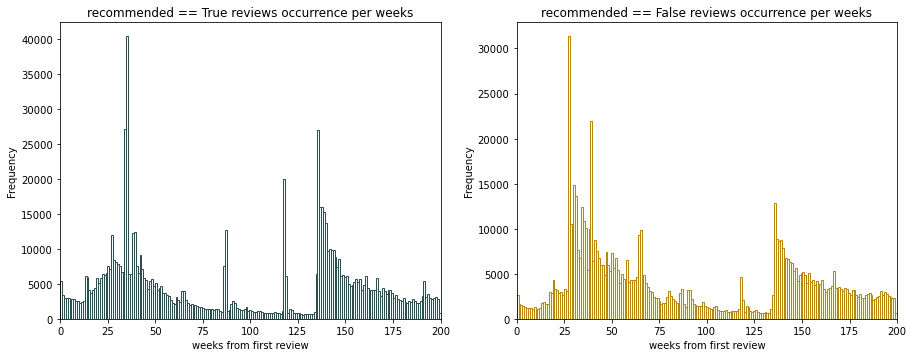

(   weeks_from_first  recommended
 0                35        40378
 1                34        27197
 2               136        26950,
 count    886417.000000
 mean         92.884182
 std          59.793967
 min           0.000000
 25%          35.000000
 50%          87.000000
 75%         145.000000
 max         200.000000
 Name: weeks_from_first, dtype: float64,
    weeks_from_first  recommended
 0                27        31341
 1                39        21949
 2                30        14804,
 count    757838.000000
 mean         89.029894
 std          57.669264
 min           0.000000
 25%          38.000000
 50%          67.000000
 75%         144.000000
 max         200.000000
 Name: weeks_from_first, dtype: float64)

In [49]:
plot_review_release(dataset[(dataset['app_name'] == "PLAYERUNKNOWN'S BATTLEGROUNDS")])

The distribution per week of positive and negative reviews is quite similar.

#### "Grand Theft Auto V"

In [50]:
t_range_2 = [parsedate(dataset[(dataset['app_name'] == "Grand Theft Auto V")]['timestamp_created'].min()), parsedate(dataset[(dataset['app_name'] == "Grand Theft Auto V")]['timestamp_created'].max())]
print("Time span (Grand Theft Auto V) reviews: from", t_range_2[0], "to", t_range_2[1])

Time span (Grand Theft Auto V) reviews: from 2015-04-13 23:50:07 to 2021-01-23 17:16:00


<ipython-input-45-25da3d7d11f2>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



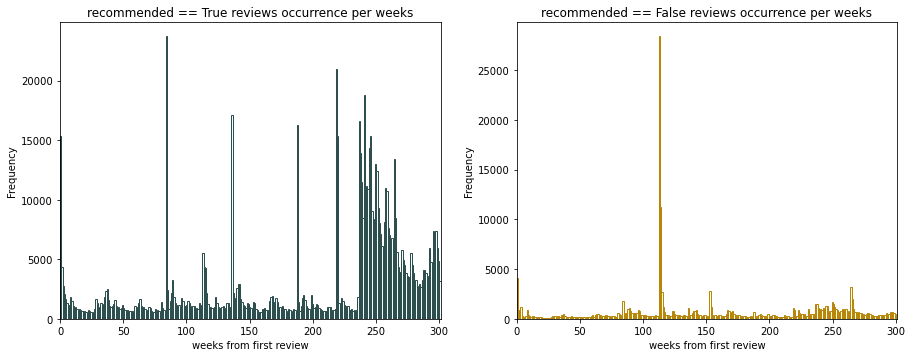

(   weeks_from_first  recommended
 0                84        23704
 1               219        20958
 2               241        18809,
 count    831311.000000
 mean        198.348875
 std          85.120060
 min           0.000000
 25%         136.000000
 50%         239.000000
 75%         259.000000
 max         301.000000
 Name: weeks_from_first, dtype: float64,
    weeks_from_first  recommended
 0               113        28384
 1               114        11188
 2                 0         4087,
 count    187805.000000
 mean        157.189292
 std          81.042099
 min           0.000000
 25%         113.000000
 50%         136.000000
 75%         239.000000
 max         301.000000
 Name: weeks_from_first, dtype: float64)

In [51]:
plot_review_release(dataset[(dataset['app_name'] == "Grand Theft Auto V")])

In this case, out of 301 weeks examined, 21% of negative reviews (as visible in the second plot) are concentrated in weeks 113 and 114.
The approval rating of this game is therefore heavily influenced by this data.

## RQ2   Let's explore the dataset by finding simple insights into the reviews.

### Plot the number of reviews for each application in descending order.

<AxesSubplot:xlabel='Name of application', ylabel='Number of reviews'>

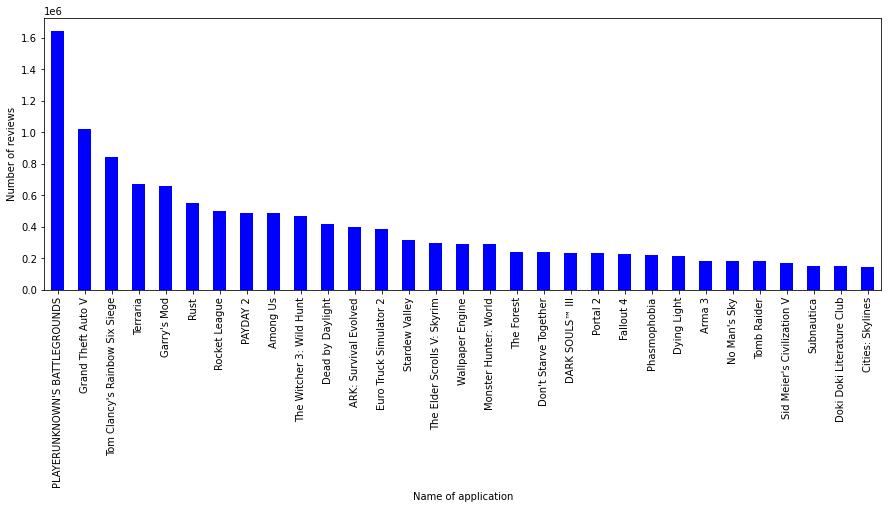

In [24]:
n_rev_game = dataset.groupby("app_name")['review_id'].count().sort_values(ascending=False)
n_rev_game[0:31].plot.bar(figsize = (15, 5), xlabel='Name of application', ylabel='Number of reviews', color = "blue")

### What applications have the best Weighted Vote Score?

In [25]:
best_wvs = dataset.groupby("app_name")['weighted_vote_score'].mean().sort_values(ascending=False).head(30).reset_index()
best_wvs

app_name  weighted_vote_score
0               Hunt Down The Freeman             0.502150
1                        Urban Empire             0.438623
2                  METAL GEAR SURVIVE             0.421632
3                            Identity             0.415384
4                      Umbrella Corps             0.414678
5          Torment: Tides of Numenera             0.411199
6    BERSERK and the Band of the Hawk             0.397092
7             DRAGON QUEST HEROES™ II             0.381110
8                           X Rebirth             0.380447
9                          Toukiden 2             0.380300
10  Warhammer 40,000: Dawn of War III             0.377935
11                 DYNASTY WARRIORS 9             0.371213
12         RollerCoaster Tycoon World             0.365161
13            Wolfenstein: Youngblood             0.354932
14        Steel Division: Normandy 44             0.351986
15   SENRAN KAGURA Peach Beach Splash             0.347711
16                   Clicker Heroes 2             0.345768
17                Takedown: Red Sabre             0.337137
18                     Secret of Mana             0.336822
19                       Bless Online             0.331621
20                           Artifact             0.323762
21                           Desolate             0.322193
22                                SOS             0.321467
23     Call of Duty: Infinite Warfare             0.321253
24                         Cube World             0.319483
25                           WWE 2K17             0.318298
26                      Dead Rising 4             0.315530
27                     The Wild Eight             0.314761
28                    Rapture Rejects             0.314585
29                  Deus Ex: The Fall             0.310173

### Which applications have the most and the least recommendations? How many of these applications were purchased, and how many were given for free?

In [26]:
# most_rec: dataframe #recommended == True per 'app_name'
most_rec = dataset[(dataset.recommended == True)].groupby('app_name')['recommended'].count().sort_values(ascending=False).reset_index()
most_rec = most_rec.rename(columns={'recommended': 'rec_True'})

# least_rec: dataframe #recommended == False per 'app_name'
least_rec = dataset[(dataset.recommended == False)].groupby('app_name')['recommended'].count().sort_values(ascending=False).reset_index()
least_rec = least_rec.rename(columns={'recommended': 'rec_False'})

In [27]:
# rec: dataframe total recommended per 'app_name'
rec = dataset.groupby('app_name')['recommended'].count().reset_index()

# We merge the df and match them on 'app name'
mergedf = most_rec.merge(least_rec, left_on = 'app_name', right_on = 'app_name')
mergedf = mergedf.merge(rec, left_on = 'app_name', right_on = 'app_name')

# percent_True: ratio column added
mergedf['percent_True'] = mergedf['rec_True'] / mergedf['recommended']

# percent_False: percent_True complement
mergedf['percent_False'] = 1 - mergedf['percent_True']

In [28]:
# steam_rT: dataframe #(recommended == True & steam_purchase == True) per 'app_name'
steam_rT = dataset[(dataset['steam_purchase'] == True) & (dataset['recommended'] == True)].groupby('app_name')['steam_purchase']\
.count().reset_index()
steam_rT = steam_rT.rename(columns={'steam_purchase': 'purchase_recTrue'})
# steam_rF: dataframe #(recommended == False & steam_purchase == True) per 'app_name'
steam_rF = dataset[(dataset['steam_purchase'] == True) & (dataset['recommended'] == False)].groupby('app_name')['steam_purchase']\
.count().reset_index()
steam_rF = steam_rF.rename(columns={'steam_purchase': 'purchase_recFalse'})

# free_rT: dataframe #(recommended == True & received_for_free == True) 'app_name'
free_rT = dataset[(dataset['received_for_free'] == True) & (dataset['recommended'] == True)].groupby('app_name')['received_for_free']\
.count().reset_index()
free_rT = free_rT.rename(columns={'received_for_free': 'free_recTrue'})
# free_rF: dataframe #(recommended == False & received_for_free == True) 'app_name'
free_rF = dataset[(dataset['received_for_free'] == True) & (dataset['recommended'] == False)].groupby('app_name')['received_for_free']\
.count().reset_index()
free_rF = free_rF.rename(columns={'received_for_free': 'free_recFalse'})

In [29]:
merge_stfr = mergedf.merge(steam_rT, left_on = 'app_name', right_on = 'app_name')
merge_stfr = merge_stfr.merge(steam_rF, left_on = 'app_name', right_on = 'app_name')
merge_stfr = merge_stfr.merge(free_rT, left_on = 'app_name', right_on = 'app_name')
merge_stfr = merge_stfr.merge(free_rF, left_on = 'app_name', right_on = 'app_name')

relatively most recommended

In [30]:
merge_stfr[['app_name', 'percent_True', 'rec_True', 'purchase_recTrue', 'free_recTrue']].sort_values(by=['percent_True'], ascending=False).head(15).reset_index()

index                           app_name  percent_True  rec_True  \
0     158      The Henry Stickmin Collection      0.990258     19211   
1      43                           Factorio      0.989186    107111   
2      38                              Hades      0.988760    117085   
3      18                           Portal 2      0.987694    229470   
4     145                  People Playground      0.987690     25995   
5     211                         Townscaper      0.987107      7503   
6      98                    Half-Life: Alyx      0.986869     50428   
7     206  There Is No Game: Wrong Dimension      0.984778      8281   
8      47                           RimWorld      0.983007     92443   
9     175                        Baba Is You      0.982401     11555   
10    183                               DUSK      0.981900     10850   
11    169             One Finger Death Punch      0.981682     15220   
12     14                   Wallpaper Engine      0.981676    287425   
13    250                         Nova Drift      0.981633      3474   
14     35      The Binding of Isaac: Rebirth      0.981349    122069   

    purchase_recTrue  free_recTrue  
0              18426           525  
1              85518          1122  
2             108234           975  
3             180668          5686  
4              24733          1086  
5               7159            73  
6              42089          2653  
7               7738            89  
8              76020           916  
9              10217           108  
10              9705           241  
11             11679           257  
12            264905          7494  
13              2991           226  
14            105815          1480

most recommended

In [31]:
merge_stfr[['app_name', 'rec_True', 'purchase_recTrue', 'free_recTrue']].sort_values(by=['rec_True'], ascending=False).head(15).reset_index() 

index                        app_name  rec_True  purchase_recTrue  \
0       0   PLAYERUNKNOWN'S BATTLEGROUNDS    886417            727176   
1       1              Grand Theft Auto V    831311            741173   
2       2  Tom Clancy's Rainbow Six Siege    742397            623377   
3       3                        Terraria    658741            517164   
4       4                     Garry's Mod    632558            532232   
5       5                            Rust    468892            367116   
6       6                        Among Us    463287            410021   
7       7        The Witcher 3: Wild Hunt    460252            421007   
8       8                   Rocket League    449464            336544   
9       9                        PAYDAY 2    428136            266231   
10     10          Euro Truck Simulator 2    377866            281957   
11     11                Dead by Daylight    345582            253899   
12     12           ARK: Survival Evolved    315243            251226   
13     13                  Stardew Valley    308852            258479   
14     14                Wallpaper Engine    287425            264905   

    free_recTrue  
0          43427  
1          35160  
2          33093  
3          19594  
4          23975  
5          18021  
6          20429  
7           5633  
8          16975  
9          35682  
10         17101  
11         17129  
12         10272  
13          5741  
14          7494

relatively least recommended

In [32]:
merge_stfr[['app_name', 'percent_False', 'rec_False', 'purchase_recFalse', 'free_recFalse']].sort_values(by=['percent_False'], ascending=False).head(15).reset_index() 

index                    app_name  percent_False  rec_False  \
0     299                    Identity       0.756652       1365   
1     286  RollerCoaster Tycoon World       0.754902       4004   
2     277                         SOS       0.721594       4979   
3     295              Umbrella Corps       0.717764       1798   
4     227                    NBA 2K18       0.708035      13253   
5     268          DYNASTY WARRIORS 9       0.687716       5369   
6     294                Urban Empire       0.670000       1541   
7     288           Deus Ex: The Fall       0.655679       2367   
8     226                    NBA 2K21       0.649317      10217   
9     293                 Down To One       0.620657       1304   
10    296       Hunt Down The Freeman       0.620386       1126   
11    245                Bless Online       0.620379       6326   
12    222                  Cube World       0.612012       9996   
13    202                    NBA 2K19       0.605518      13586   
14    281                    WWE 2K20       0.604728       2200   

    purchase_recFalse  free_recFalse  
0                 371             18  
1                2158             38  
2                3421            176  
3                 512            128  
4               10519            104  
5                3757            157  
6                1203             14  
7                1825             12  
8                7064            101  
9                1050             33  
10                979             70  
11               4459            108  
12               4502            641  
13               9126            196  
14               1285             46

least recommended

In [33]:
merge_stfr[['app_name', 'rec_False', 'purchase_recFalse', 'free_recFalse']].sort_values(by=['rec_False'], ascending=False).head(15).reset_index()

index                        app_name  rec_False  purchase_recFalse  \
0       0   PLAYERUNKNOWN'S BATTLEGROUNDS     757838             645545   
1       1              Grand Theft Auto V     187805             164115   
2       2  Tom Clancy's Rainbow Six Siege      99521              79128   
3      12           ARK: Survival Evolved      84766              64789   
4       5                            Rust      80182              60738   
5      11                Dead by Daylight      73315              51888   
6       9                        PAYDAY 2      59611              36335   
7      34                    No Man's Sky      56537              49004   
8      23                       Fallout 4      49745              29620   
9       8                   Rocket League      49101              35107   
10     16           Monster Hunter: World      45550              26642   
11     72                       For Honor      32209              19035   
12     37     Sid Meier's Civilization VI      24743              16689   
13      4                     Garry's Mod      22966              19018   
14      6                        Among Us      22006              18300   

    free_recFalse  
0           18016  
1            3464  
2            3207  
3            1774  
4            1793  
5            3105  
6            2731  
7             586  
8             722  
9            1277  
10            599  
11           3622  
12            419  
13            790  
14            909

## RQ3   Now it's important to understand the preferred time to do reviews.   

#### start RQ3

In [19]:
def parsedate(time_as_a_unix_timestamp):
    return pd.to_datetime(time_as_a_unix_timestamp, unit = 's')

In [3]:
dataset = pd.read_csv('c_main.csv', header='infer',
parse_dates=['timestamp_created',
'timestamp_updated', 'author.last_played'],
date_parser=parsedate)

In [4]:
def revperint(t_col):
    # t_col: reference time collection
    t_col = [datetime.strptime(t, '%H:%M:%S') for t in t_col]
    s_1 = []
    m_1 = []
    h_1 = []
    number_reviews = []
    for i in range(len(t_col)):
        s_1.append(t_col[i].time().second)
        m_1.append(t_col[i].time().minute)
        h_1.append(t_col[i].time().hour)
    for i in range(0, len(t_col), 2):
        number_reviews.append(dataset[(dataset.timestamp_created.dt.hour >= h_1[i]) & (dataset.timestamp_created.dt.minute >= m_1[i]) & (dataset.timestamp_created.dt.second >= s_1[i]) & (dataset.timestamp_created.dt.hour <= h_1[i+1]) & (dataset.timestamp_created.dt.minute <= m_1[i+1]) & (dataset.timestamp_created.dt.second <= s_1[i+1])].review_id.count())
    xx = ['6am', '11am', '2pm', '5pm', '8pm', '12am', '3am']
    plt.bar(xx, number_reviews, color = 'midnightblue')
    plt.yscale('log')
    plt.yticks([2000000, 2250000, 2500000, 2750000, 3000000, 3250000, 3500000, 3750000, 4000000])
    plt.title('Number of reviews per interval')
    plt.xlabel('Intervals')
    plt.ylabel('Number of reviews')
    plt.show()

In [5]:
intervals = ['06:00:00', '10:59:59', '11:00:00', '13:59:59', '14:00:00', '16:59:59',
        '17:00:00', '19:59:59', '20:00:00', '23:59:59', '00:00:00', '02:59:59', '03:00:00',
        '05:59:59']

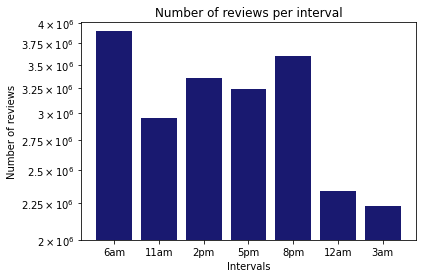

In [6]:
revperint(intervals)

## RQ4   As Steam is a worldwide platform, the reviews can be done in many languages. Let's extract some information about it.

### What are the top 3 languages used to review applications?

In [58]:
lang = pd.Series(dataset.groupby("language").review_id.count().sort_values(ascending=False).head(3))
lang

language
english     9580668
schinese    3729039
russian     2340950
Name: review_id, dtype: int64

In [59]:
top3 = list(lang.index)
top3

['english', 'schinese', 'russian']

### Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages

In [60]:
def review_lang(data, language_name):
    boolean_series = data.language.isin(language_name)
    data = data[boolean_series]
    return data.reset_index()

df = review_lang(dataset,top3)
df.head()

index  app_id                  app_name  review_id  language  \
0      0  292030  The Witcher 3: Wild Hunt   85185598  schinese   
1      1  292030  The Witcher 3: Wild Hunt   85185250  schinese   
2      2  292030  The Witcher 3: Wild Hunt   85185111  schinese   
3      3  292030  The Witcher 3: Wild Hunt   85184605   english   
4      4  292030  The Witcher 3: Wild Hunt   85184287  schinese   

   timestamp_created  timestamp_updated  recommended  votes_helpful  \
0         1611381629         1611381629         True              0   
1         1611381030         1611381030         True              0   
2         1611380800         1611380800         True              0   
3         1611379970         1611379970         True              0   
4         1611379427         1611379427         True              0   

   votes_funny  ...  steam_purchase  received_for_free  \
0            0  ...            True              False   
1            0  ...            True              False   
2            0  ...            True              False   
3            0  ...            True              False   
4            0  ...            True              False   

   written_during_early_access     author.steamid  author.num_games_owned  \
0                        False  76561199095369542                       6   
1                        False  76561198949504115                      30   
2                        False  76561199090098988                       5   
3                        False  76561199054755373                       5   
4                        False  76561199028326951                       7   

   author.num_reviews  author.playtime_forever  \
0                   2                   1909.0   
1                  10                   2764.0   
2                   1                   1061.0   
3                   3                   5587.0   
4                   4                    217.0   

   author.playtime_last_two_weeks  author.playtime_at_review  \
0                          1448.0                     1909.0   
1                          2743.0                     2674.0   
2                          1061.0                     1060.0   
3                          3200.0                     5524.0   
4                            42.0                      217.0   

   author.last_played  
0        1.611343e+09  
1        1.611386e+09  
2        1.611384e+09  
3        1.611384e+09  
4        1.610788e+09  

[5 rows x 22 columns]

In [61]:
df.shape

(15650657, 22)

### Use the function created in the previous literal to find what percentage of these reviews (associated with the top 3 languages) were voted as funny?

percentage of reviews written in the top 3 languages that received at least one vote as funny

In [66]:
rv = review_lang(dataset, top3)[review_lang(dataset, top3).votes_funny >= 1].count().app_name / review_lang(dataset, top3).count().app_name
print("{:.0%}".format(rv))

12%


### Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?

Percentage of reviews written in the top 3 languages that received at least one vote as helpful

In [67]:
rv1 = review_lang(dataset, top3)[review_lang(dataset, top3).votes_helpful >= 1].count().app_name / review_lang(dataset, top3).count().app_name
print("{:.0%}".format(rv))

12%


## RQ5_1   The reviews' authors are users from the game that provide their opinion on it. Now you can check how often they make reviews. 

Choice of popular reviewers based on frequency in the dataframe

"popular" as frequentely encountered

### Plot the top 10 most popular reviewers and the number of reviews.

In [68]:
pop_rev = dataset.groupby('author.steamid')['review_id'].count().sort_values(ascending=False).reset_index() 
pop_rev = pop_rev.rename(columns={'review_id': 'author.number_review'})
pop_rev.head(10)

author.steamid  author.number_review
0  76561198062813911                   148
1  76561198315585536                   131
2  76561198192166873                   106
3  76561198239163744                   106
4  76561198045381877                   102
5  76561198064946151                    99
6  76561198013146396                    98
7  76561198027973295                    96
8  76561197969749884                    88
9  76561197989746995                    85

### What applications did the most popular author review?

In [69]:
top_app = dataset[(dataset['author.steamid'] == pop_rev['author.steamid'][0])]['app_name']
top_app

512675                     Half-Life
539037        Counter-Strike: Source
658130      Half-Life 2: Episode Two
849477                      Portal 2
1549581                  Garry's Mod
                      ...           
21446171              Sniper Elite 4
21489963               Day of Infamy
21516139                  SimAirport
21521413               Dead Rising 4
21537291    Styx: Shards of Darkness
Name: app_name, Length: 148, dtype: object

### How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.

In [70]:
top_reviewer_df = dataset[(dataset['author.steamid'] == pop_rev['author.steamid'][0])]\
[['author.steamid', 'steam_purchase', 'received_for_free', 'recommended']]

In [71]:
total = top_reviewer_df['steam_purchase'].count()
top_purchased = top_reviewer_df[(top_reviewer_df['steam_purchase'] == True)]['steam_purchase'].count()
per_purchased = top_purchased / total
top_purchased, per_purchased
print("The most popular author purchased on steam", top_purchased, "applications, about {:.1%}".format(per_purchased), "of those he reviewed")

The most popular author purchased on steam 109 applications, about 73.6% of those he reviewed


In [72]:
top_free = top_reviewer_df[(top_reviewer_df['received_for_free'] == True)]['received_for_free'].count()
per_free = top_free / total
top_free, per_free
print("The most popular author received for free", top_free, "applications, about {:.1%}".format(per_free), "of those he reviewed")

The most popular author received for free 4 applications, about 2.7% of those he reviewed


In [73]:
other = total - top_purchased - top_free
per_other = other / total
print("The other", other, "applications, about {:.1%}".format(per_other), "of those he reviewed, may have been purchased physically or from other online shops")

The other 35 applications, about 23.6% of those he reviewed, may have been purchased physically or from other online shops


### How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

In [74]:
top_reviewer_df.columns

Index(['author.steamid', 'steam_purchase', 'received_for_free', 'recommended'], dtype='object')

In [75]:
# purchased reviewed positively by top reviewer
top_reviewer_df[(top_reviewer_df['steam_purchase'] == True) & (top_reviewer_df['recommended'] == True)]['steam_purchase'].count()

107

In [76]:
# purchased reviewed negatively by top reviewer
top_reviewer_df[(top_reviewer_df['steam_purchase'] == True) & (top_reviewer_df['recommended'] == False)]['steam_purchase'].count()

2

In [77]:
# received for free reviewed positively by top reviewer
top_reviewer_df[(top_reviewer_df['received_for_free'] == True) & (top_reviewer_df['recommended'] == True)]['received_for_free'].count()

4

In [78]:
# received for free reviewed negatively by top reviewer
top_reviewer_df[(top_reviewer_df['received_for_free'] == True) & (top_reviewer_df['recommended'] == False)]['received_for_free'].count()

0

## RQ5_2   Alternative way

Choice of popular reviewers based on helpful votes weighted by the "spread" of the game (imposing a minimum of single user reviews)

"popular" as famous

popular as the one who frequently releases helpful voted reviews, normalised to the average of helpful voted reviews of the same game

In [79]:
hel_rev = dataset[(dataset['votes_helpful'] > 0)].groupby('app_name')['votes_helpful'].mean().reset_index()
hel_rev = hel_rev.rename(columns={'votes_helpful': 'mean_helpful'})

In [80]:
new_data = dataset[['app_name', 'author.steamid', 'steam_purchase', 'received_for_free', 'recommended', 'votes_helpful', 'votes_funny']]

In [81]:
mer_hel = new_data.merge(hel_rev, left_on = 'app_name', right_on = 'app_name')
mer_hel['nor_helpful'] = mer_hel['votes_helpful'] / mer_hel['mean_helpful']

In [82]:
pop_rev2 = mer_hel.groupby('author.steamid')['nor_helpful'].mean().reset_index()

In [83]:
pop_rev2 = pop_rev2.merge(pop_rev, left_on = 'author.steamid', right_on = 'author.steamid')
pop_rev2 = pop_rev2[(pop_rev2['nor_helpful'] > 1) & (pop_rev2['author.number_review'] > 30)].reset_index()
pop_rev2

index     author.steamid  nor_helpful  author.number_review
0        5055  76561197960373660     1.029356                    49
1        6066  76561197960396581     1.124186                    33
2       14468  76561197960675266     5.682453                    38
3       21829  76561197961038549     6.721323                    49
4       33564  76561197961766636     1.186780                    41
..        ...                ...          ...                   ...
458  10546652  76561198859953257     1.412488                    31
459  10561144  76561198861342661     6.732432                    38
460  10602666  76561198864851315     2.049527                    34
461  11207399  76561198970738313     4.559699                    40
462  11209983  76561198970946290     1.145162                    38

[463 rows x 4 columns]

In [84]:
pop_rev2.sort_values(by= 'nor_helpful', ascending=False).head(10).reset_index()

level_0    index     author.steamid  nor_helpful  author.number_review
0      332  4512371  76561198131604201    53.807483                    37
1      116   936198  76561198012128513    36.295724                    32
2      212  2226155  76561198057097038    35.593105                    33
3      145  1225580  76561198024451265    28.907994                    41
4      123   997800  76561198014766672    28.117971                    33
5      173  1591576  76561198037920209    26.622708                    49
6      184  1763586  76561198043250032    25.189687                    37
7      416  7063549  76561198283725587    23.836202                    34
8      256  2877294  76561198076416756    22.740224                    31
9       26   200228  76561197972368197    17.928296                    32

## RQ6   It's time to get information from the updates that a user does to his reviews.

### What is the average time (days and minutes) a user lets pass before he updates a review?

In [18]:
updates = dataset[(dataset['timestamp_updated'] > dataset['timestamp_created'])][['review_id', 'author.steamid', 'timestamp_created', 'timestamp_updated']]
updates['delta'] = updates['timestamp_updated'] - updates['timestamp_created']
updates

review_id     author.steamid  timestamp_created  timestamp_updated  \
13         85181146  76561197987104694         1611374238         1611374309   
27         85177648  76561198326913512         1611368730         1611379495   
39         85174926  76561198020027165         1611364401         1611364470   
41         85173767  76561198316530785         1611362536         1611364881   
51         85170497  76561199039857291         1611357379         1611357430   
...             ...                ...                ...                ...   
21612429   65645333  76561198055305524         1584986911         1585589559   
21612430   65645312  76561197997569585         1584986884         1584989792   
21612435   65645193  76561198041215776         1584986790         1585125462   
21612442   65645066  76561198041763187         1584986631         1586382422   
21612443   65644930  76561198116747069         1584986505         1592060800   

            delta  
13             71  
27          10765  
39             69  
41           2345  
51             51  
...           ...  
21612429   602648  
21612430     2908  
21612435   138672  
21612442  1395791  
21612443  7074295  

[2433129 rows x 5 columns]

In [19]:
updates.drop(['timestamp_created', 'timestamp_updated'], axis=1, inplace=True)

In [24]:
def rel_dm(timestamp):
    # delta timestamp (s) conversion
    days = int(timestamp // 86400)
    rest = timestamp % 86400
    minutes = int(rest // 60)
    dm = [days, minutes]
    print("Average time before update:", dm[0], "days", dm[1], "minutes")
    return dm

In [25]:
mean_time = rel_dm(updates['delta'].mean())

Average time before update: 321 days 1326 minutes


### Plot the top 3 authors that usually update their reviews.

In [26]:
up_rev = updates.groupby('author.steamid')['review_id'].count().sort_values(ascending=False).head(3).reset_index()
up_rev = up_rev.rename(columns={'review_id': 'number_updates'})
up_rev

author.steamid  number_updates
0  76561198192166873              94
1  76561198206999976              60
2  76561198072450805              60

## RQ7   Of course, calculating probabilities is a job that any Data Scientist must know. Let's compute Some interesting figures.

### What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?

In [31]:
p_A = len(dataset[(dataset['weighted_vote_score'] >= 0.5)]['review_id']) / len(dataset['review_id'])
p_A

0.2202049893107878

### What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?

In [32]:
p_BgivA = len(dataset[(dataset['weighted_vote_score'] >= 0.5) & (dataset['votes_funny'] > 0)]['review_id'])\
/ len(dataset[(dataset['weighted_vote_score'] >= 0.5)]['review_id'])
p_BgivA

0.24950243403889083

### Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?

In [33]:
p_AintB = len(dataset[(dataset['weighted_vote_score'] >= 0.5) & (dataset['votes_funny'] > 0)]['review_id'])\
/ len(dataset['review_id'])
p_B = len(dataset[(dataset['votes_funny'] > 0)]['votes_funny']) / len(dataset['review_id'])
p_B

0.11991619272674575

In [34]:
# check independence by definition
p_AintB == p_A * p_B

False

In [35]:
omega = dataset['review_id']
A = dataset[(dataset['weighted_vote_score'] >= 0.5)]['review_id']
B = dataset[(dataset['votes_funny'] > 0)]['review_id']
# AintB = dataset[(dataset['weighted_vote_score'] >= 0.5) & (dataset['votes_funny'] > 0)]['review_id']

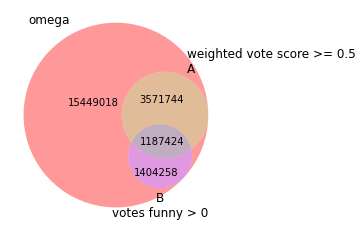

In [36]:
venn3([set(omega), set(A), set(B)], set_labels = ('omega', 'weighted vote score >= 0.5\nA', 'B\nvotes funny > 0'))
plt.show()

## RQ8   Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check if a hypothesis is correct or not.

### Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choice.

In [3]:
Russia=dataset[dataset['language']=='russian']
China=dataset[dataset['language']=='schinese']

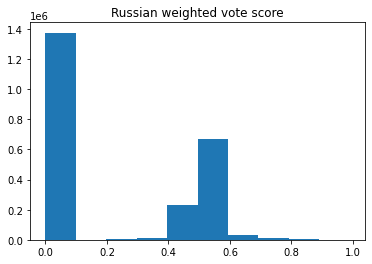

In [4]:
plt.hist(Russia.weighted_vote_score)
plt.title("Russian weighted vote score")
plt.show()

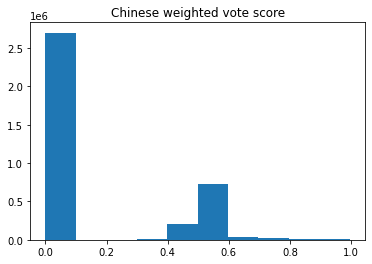

In [5]:
plt.hist(China.weighted_vote_score)
plt.title('Chinese weighted vote score')
plt.show()

Graphically it seems to exist a similarity in the distribution of the two dataset, but for having a certain answer we have to calculate the Mann-Whitney U Test to compare two different (non-parametric) distributions, in order to test whether the values from the two groupings of the weighted vote score variable come from the same population.

In [6]:
u_stat, p_val = sci.mannwhitneyu(list(China['weighted_vote_score']), list(Russia['weighted_vote_score']))
print(f'U-stat: {u_stat}\t p-value: {p_val}')

U-stat: 3809724900014.5	 p-value: 0.0


Since the p vlue is lower than 0.05, the two variable don't come from the same population.

### Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.

We just want to know if there is some correlations between the delta time (timestap_updated - timestamp_created) and the weighted_vote_score. For this reason we have to calculate Pearson coefficient.

In [7]:
delta = dataset.timestamp_updated-dataset.timestamp_created
weighted_vote = dataset.weighted_vote_score
person = sci.pearsonr(weighted_vote, delta)
print("Pearson coefficient:", person[0])

Pearson coefficient: 0.07193209255157995


This coefficient is 0.0720, that is very low to infer a strong correlation between the two sets, but we know that exist a very very weak positive correlation, due to the fact that if Pearson's coefficient is 0 there isn't a correlation, but if it is higher than 0 and lower than 1 exist a positive correlation: in this case the value is very low, near to zero. 

To understand this weak correlation we can have a look at the scatter-plot related to the two data sets.

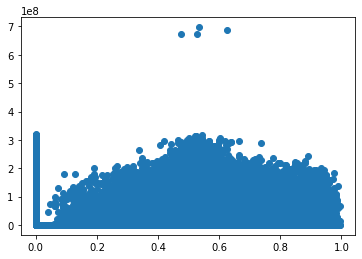

In [8]:
plt.scatter(weighted_vote, delta)
plt.show()

### Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.

For this question we have to split our dataset in two part: recommended and not recommended and then work separately on each, applying the same operations done before for the entire dataset.

In [14]:
rec = dataset[dataset['recommended']==True]
not_rec = dataset[dataset['recommended']!=True]

In [15]:
#recommended
delta_rec = rec.timestamp_updated-rec.timestamp_created
weighted_vote_rec = rec.weighted_vote_score
person = sci.pearsonr(weighted_vote_rec, delta_rec)
print("Pearson coefficient:", person[0])

Pearson coefficient: 0.0793880115299335


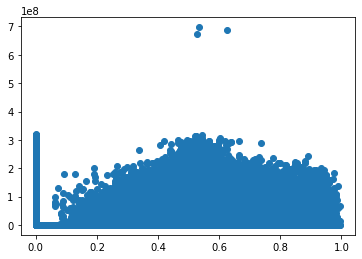

In [16]:
#recommended
plt.scatter(weighted_vote_rec, delta_rec)
plt.show()

In [17]:
#not_recommended
delta_not_rec = not_rec.timestamp_updated-not_rec.timestamp_created
weighted_vote_not_rec = not_rec.weighted_vote_score
person = sci.pearsonr(weighted_vote_not_rec, delta_not_rec)
print("Pearson coefficient:", person[0])

Pearson coefficient: -0.001661944090821585


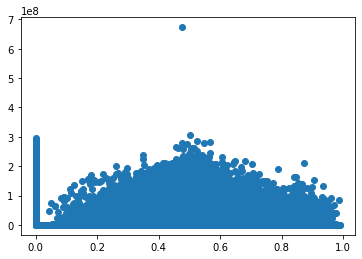

In [18]:
#not_recommended
plt.scatter(weighted_vote_not_rec, delta_not_rec)
plt.show()

As we can see from the scatter plot, in the case of 'recommented' set Pearson's coeffcient is nearly the same as in the case with the entire set: so it seems that there isn't such a strong correlation.
Likewise, in the 'not recommented' set Pearson's value is nearer to zero, but it is negative.

In conclusion there doesn't seem to be big differencies from the analysis done on the entire set.

### What are histograms, bar plots, scatterplots and pie charts used for?

An histogram is a way to visualize the distribution of numerical (discrete or continuous) data. In particular its purpose is to roughly assess the probability distribution of a given variable by depicting the frequencies of observations occurring in certain ranges of values. For built an histogram the first thing to do is to divide the range of value in "bin", an interval of the total range. Then we have to count how many values fall into each interval. The high of every bin is given by the total number of every value that fall into that bin.

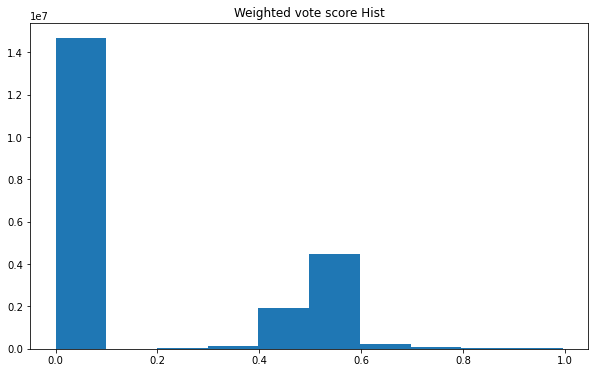

In [9]:
plt.figure(figsize = (10, 6))
plt.hist(weighted_vote)
plt.title('Weighted vote score Hist')
plt.show()

A bar plot is used to show the relationship between a numeric and categoric variable: on one axis there is the rammpresentation of the values, on the other there is the set of the bar, one for each entity: the size of the bars represent the numeric value.

Text(0.5, 1.0, 'Reviews per language')

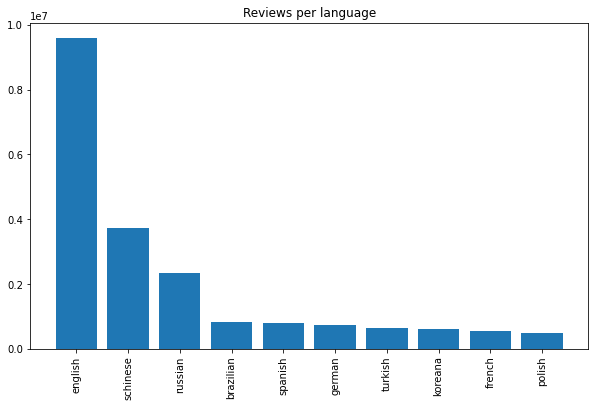

In [10]:
lang = dataset.groupby("language")["review_id"].count().sort_values(ascending=False)[:10]

plt.figure(figsize=(10,6))
plt.bar(lang.index,
        lang,)
plt.xticks(rotation=90)
plt.title("Reviews per language")

A scatter plot is a visual representation of data, in which we use dots to represent the value of two numeric variables. For each axis the point corresponding to the value of one of the two variables is marked, a straight line is drawn for each marked point, and a point is placed in the intersection. Scatter plots are used to observe relationships between variables.

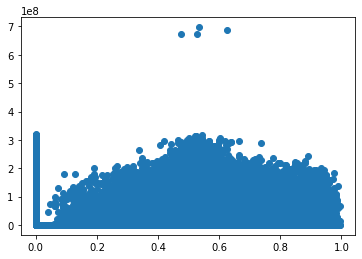

In [11]:
#from the previous question
plt.scatter(weighted_vote, delta)
plt.show()

A pie chart is a data visualization used to represent proportion in a dataset: it is composed by a circle divided into sectors (or slices), each of these show the quantity of a particular data. It can be thinked as the percentage: the whole circle represent the 100%, every slice is the percentage of the data in relation of the entire set and so the sum of every slices is 100%.

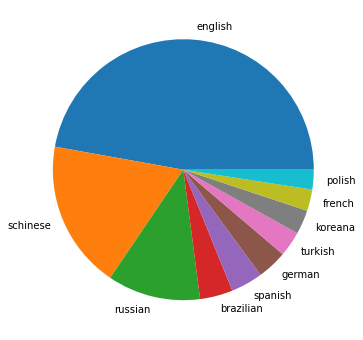

In [12]:
plt.figure(figsize=(10, 6))
labs=lang.index
plt.pie(list(lang), labels=labs, pctdistance=0.2)
plt.show()

### What insights can you extract from a Box Plot?

 From a box plot we can extract some usefull metrics to describe and understand our dataset. For example:

Quantiles (in particular 1st and 3rd) which correspond to the 25th and 75th percentiles, 

Median, the mid-point in the distribution, which also corresponds to the 50th percentile,

Interquartile range (IQR), the width between the third and first quantiles (IQR = Q3 — Q1), 

Min, minimum value in the dataset excluding outliers, which corresponds to Q1–1.5xIQR

Max, maximum value in the dataset, excluding outliers, which corresponds to Q3+ 1.5xIQR

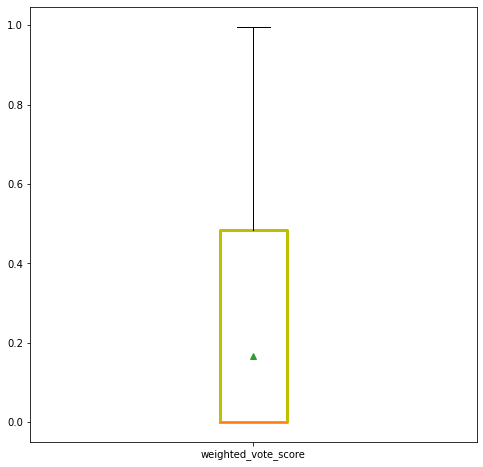

In [13]:
plt.figure(figsize = (8, 8))
plt.boxplot(weighted_vote, boxprops = dict(linewidth=3, color='y') ,showmeans=True)
plt.xticks([1], ['weighted_vote_score'])
plt.show()

## TQ1

### What does the algorithm compute?

In [ ]:
'''
import random

Input: 
    A: array of length n
    k: integers between 1 and n
    
function alg(A, k):
  s <-- a random element of A
  set L = [all the elements of A with value <= s]
  set R = [all the elements of A with value > s]
  r = len(L)
  if k == r:
    return s
  else if k < r:  
    return alg(L, k)
  else:
    return alg(R, k - r)
    
'''

It is a recursive algorithm which returns the k-th smallest value of the list A.

For example, having the array A:

A=[4, 9, 7, 10, 13, 2, 8, 17, 20, 15]
k=3

**1st step**
s=9
L=[4, 9, 7, 2, 8]
R=[10, 13, 17, 20, 15]

**2nd step**
s=8
L=[4, 7, 2, 8]
R=[9]

**3rd step**
s=7
L=[4, 7, 2]
R=[8]

final result: **7**, is the 3rd smallest value of the list.


### What is asymptotically (i.e., we are asking for big-O complexity) the running time of the algorithm in the worst case, as a function of n?

The worst case for this algorithm is to never terminate: the choice of the variable "s" is in fact random, which means that the algorithm may never terminate. In fact, if the function that randomly chooses the value of s always chooses the wrong value, it would never come to an end, generating an infinite loop.
Assuming that the algorithm sooner or later chooses the right element, asymptotically in the worst case its running time will be T(n)=O(n^2), due to the recursive call on a part of the array.

### What is asymptotically the running time of the algorithm in the best case?

In the best case, s will be equal to k (by computing the lenght of the array L and comparing it to k) and just return the value of s: there will be just one iterations and so the running time is in the order of n, T(n)=O(n), because it have to check every element of the array for splitting it into sub-array R and L.

## TQ2

In [ ]:
"""function splitSwap(a, l, n):

    if n <= 1:

        return

    splitSwap(a, l, n/2)

    splitSwap(a, l+ n /2, n/2)

    swapList(a, l, n)


function swapList(a, l, n):

    for i = 0 to n/2:

    tmp = a[l + i]

    a[l + i] = a[l + n/2 + i]

    a[l + n/2 + i] = tmp"""

### How much running time does it take to execute splitSwap(a, 0, n)? (We want a Big O analysis.)

- function swapList does 3*n/2 istructions, so it has complexity Omega(n/2)

- function splitSwap calls itself two times (2T) each time on half of the array a (n/2)


So its running time is T(n)=2T(n/2)+Omega(n/2), and its total complexity is O(nlogn).

### What does this algorithm do? Is it optimal? Describe the mechanism of the algorithm in details, we do not want to know only its final result.

splitSwap function is a recursive function that follows the algorithm design paradigm "divide and conquer" (or "divide et impera"), in which a problem is recursively  divided into small problems of the same nature until we find a "base case", the simplest case. To find the global solution of the problem, we combine the solution of every single sub-problem.
In this case, the function takes as parameters an array a, an index i and the lenght of the array: in each step the algorithm divide the array into two pieces, and then on each part of the array the same function will be called, until the lenght of the array will be 1 (base case). At the end of every single step swapList will be called: this function compute the iterative swap of the element in position l(+i) and position l+n/2(+i).
The final result is the inverted array of the original array passed to the splitswap() function.

If a=[1, 2, 3, 4, 5, 6, 7, 8] 
then the final solution will be a=[8, 7, 6, 5, 4, 3, 2, 1].

1 step: [1, 2, 3, 4][5, 6, 7, 8]

2 step: [1, 2][3, 4][5, 6][7, 8]

3 step: [1][2][3][4][5][6][7][8]

4 step: [2, 1][4, 3][6, 5][8, 7]

5 step: [4, 3, 2, 1][8, 7, 6, 5]

6 step: [8, 7, 6, 5, 4, 3, 2, 1]


For sure it isn't optimal, because if the only pourpose of the algorithm is to swap every array element, it can be done with an algorithm with complexity O(n/2):


In [ ]:
"""function swapA(a, n):

    for i=0 to n/2:

        tmp=a[i]

        a[i]=a[n/2-i]

        a[n/2-i]=tmp"""

## TQ3

For the Knapsack problem we consider W the total weight budjet and for each object i his weight w_i and his value v_i, we indicate with V the amount of values in the bag.

**1st heuristics:**

- order them in increasing order of weight and then visit them sequentially, adding them to the solution as long as the budget is not exceeded.

This heuristics will fail in the case in which every object i has a weight w and a value v=w^2. For example:

| object | A | B | C | D | E | F |
| --- | --- | --- | --- | --- | --- | --- |
| value | 1 | 4 | 9 | 16 | 25 | 36 |
| weight | 1 | 2 | 3 | 4 | 5 | 6 |


with maximum W=10.

The optimal solution is to choose only the element F with W=6 and V=36; instead with this heuristic the solution is to choose the objects A, B, C, D with W=10 and V=30.


**2nd heuristics:**
- order them in decreasing order of values, and then visit them sequentially, adding them to the solution if the budget is not exceeded.

A counterexample can be the follow situation:


| object | A | B | C | D | E | 
| --- | --- | --- | --- | --- | --- | 
| value | 1000 | 999 | 999 | 999 | 999 | 
| weight | 95 | 10 | 10 | 10 | 10 | 

with maximum W=100

In this case the optimal solution is to choose object B, C, D, E, with W=40 and V=4*999, instead the solution provided by this heuristic is to choose just the first element (A), with W=95 and V=1000.



**3rd heuristics:**
- order them in decreasing relative value (v_i / w_i), and then visit them sequentially, adding them to the solution if the budget is not exceeded.

Having these object:

| object | A | B | C | 
| --- | --- | --- | --- | 
| value | 5 | 3 | 3 | 
| weight | 3 | 2 | 2 | 

with maximum W=4

The heuristics in this case is based on the relation (ratio) between v/w and so for this example we have

| object | A | B | C |
| --- | --- | --- | --- |
| v/w | 1.6 | 1.5 | 1.5 |

and so the algorithm will chose the object A with W=3 and V=5, because it has the maximum ratio. In the optimal case we will choose element B and C with W=4 and V=6.

## TQ3_v2

Order them in increasing order of weight and then visit them sequentially, adding them to the solution as long as the budget is not exceeded

In [23]:
w = [36, 30, 14, 1, 5, 17, 10, 12]           # D.keys()
v = [100, 90, 50, 4, 25, 63, 81, 70]         # D.values()
# len(v) == len(w)
D = dict(zip(w, v))

In [24]:
sorted_values =sorted(D.values(), reverse = True) # Sort the values
sorted_w = {}

for i in sorted_values:
    for k in D.keys():
        if D[k] == i:
            sorted_w[k] = D[k]
            break
for k, j in sorted_w.items():
    print (k, j)

36 100
30 90
10 81
12 70
17 63
14 50
5 25
1 4


Order them in decreasing order of values, and then visit them sequentially, adding them to the solution if the budget is not exceeded

In [25]:
for el in sorted(D, reverse = True):
    print(el, D[el])

36 100
30 90
17 63
14 50
12 70
10 81
5 25
1 4


Order them in decreasing relative value (v_i / w_i), and then visit them sequentially, adding them to the solution if the budget is not exceeded

In [26]:
for i in range(len(D)):
    print(round(v[i]/w[i], 2))

2.78
3.0
3.57
4.0
5.0
3.71
8.1
5.83
